##**Object Detection**

Implement a solution to perform object detection from images using a pre-built
model such as YOLO.

#implementation
In this task, we will use YOLO, one of the best models for object recognition.
Different to R-CNN, Fast R-CNN or Faster R-CNN where the scanning has to go for
several rounds, YOLO only scans the input image once, therefore the name “You
Only Look Once (YOLO)”. 

    * there are two versions of yolo
          tiny yolo
          yolo

 Tiny yolo is a basics version while yolo is more accurate and heavy model. 

      the algorithm works based on the following four approach:--

      *  Residual blocks
      *  Bounding box regression
      *  Intersection Over Unions or IOU for short
      *  Non-Maximum Suppression. 

In [ ]:
!pip install cvlib
import cvlib 
from cvlib.object_detection import draw_bbox, YOLO

In [1]:
# Download the YOLOv3 model configuration, weights and labels files
!wget https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3-tiny.cfg -O yolov3-tiny.cfg
!wget https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3-tiny.weights -O yolov3-tiny.weights
!wget https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3.txt -O yolov3.txt

!wget https://bitbucket.org/sunnykumar1516/yolo-basics/raw/a66a9bec9d48b3997dee1996e842f57bcf301cb3/yolov3.cfg -O yolov3.cfg
!wget https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3.weights -O yolov3.weights
!wget https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3.txt -O yolov3.txt


path = ""

# Alternatively you can save the data to your Google Drive, and load the data from there
#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/My Drive/data/"


--2022-12-30 13:33:16--  https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3-tiny.cfg
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1915 (1.9K) [text/plain]
Saving to: ‘yolov3-tiny.cfg’

yolov3-tiny.cfg     100%[===================>]   1.87K  --.-KB/s    in 0s      

2022-12-30 13:33:16 (671 MB/s) - ‘yolov3-tiny.cfg’ saved [1915/1915]

--2022-12-30 13:33:16--  https://bitbucket.org/sunnykumar1516/yolo-basics/raw/8dfbe3b70dfce9f2c439770dd9c4bf4a72fd2cdb/yolov3-tiny.weights
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [applicat

In [ ]:
# The default YOLO model files
#config = path + 'yolov3.cfg'
#weights = path + 'yolov3.weights'
#labels = path + 'yolov3.txt'

# # Alternative the "tiny" version of YOLO, which is faster but less accurate
config = path + 'yolov3-tiny.cfg'
weights = path + 'yolov3-tiny.weights'
labels = path + 'yolov3.txt'

# Construct the YOLOv3 Model
yolo = YOLO(weights, config, labels)


[INFO] Initializing YOLO ..


In [ ]:
# # Load the image files to Google Colab
from google.colab import files
file = files.upload()

Saving car.png to car.png


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image file
img = cv2.imread(path+'dog.png')
# img = cv2.imread(path+'objects2.jpg')
cv2_imshow(img)
print("BOXES")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Detect objects from the image, and display the results
bbox, label, conf = yolo.detect_objects(img)
bbox, label, conf = yolo.detect_objects(img, confidence=0.25, nms_thresh=0.50)
yolo.draw_bbox(img, bbox, label, conf)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# The default YOLO model files
img = cv2.imread(path+'dog.png')
config = path + 'yolov3.cfg'
weights = path + 'yolov3.weights'
labels = path + 'yolov3.txt'

bbox, label, conf = yolo.detect_objects(img)
bbox, label, conf = yolo.detect_objects(img, confidence=0.25, nms_thresh=0.50)
yolo.draw_bbox(img, bbox, label, conf)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install --upgrade mxnet
# for pytorch!
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

!pip install --upgrade gluoncv

In [ ]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

/usr/local/lib/python3.8/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.6.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [ ]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:03, 61856.35KB/s]                            


In [ ]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

100%|██████████| 160/160 [00:00<00:00, 10282.52KB/s]

Shape of pre-processed image: (1, 3, 512, 683)


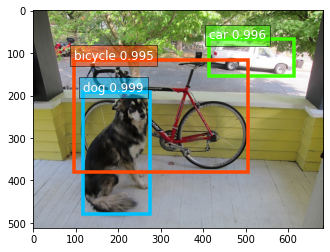

In [ ]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

#Discussion
Above we have used both yolo and tiny yolo on set of images.
Although yolo took more time in idenficication of objects, in comparisio to tiny yolo.



#Future Scope
* yolo can also be trained with custom images. 

* Although trainning of yolo takes considerable amount of time , but it predicts objects with high accuracy.

* also we can create and deploy models on mobile devices , for on the edge detection.



